<a href="https://colab.research.google.com/github/pedrocz82/Data-Science-learning-projects/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic survival prediction**

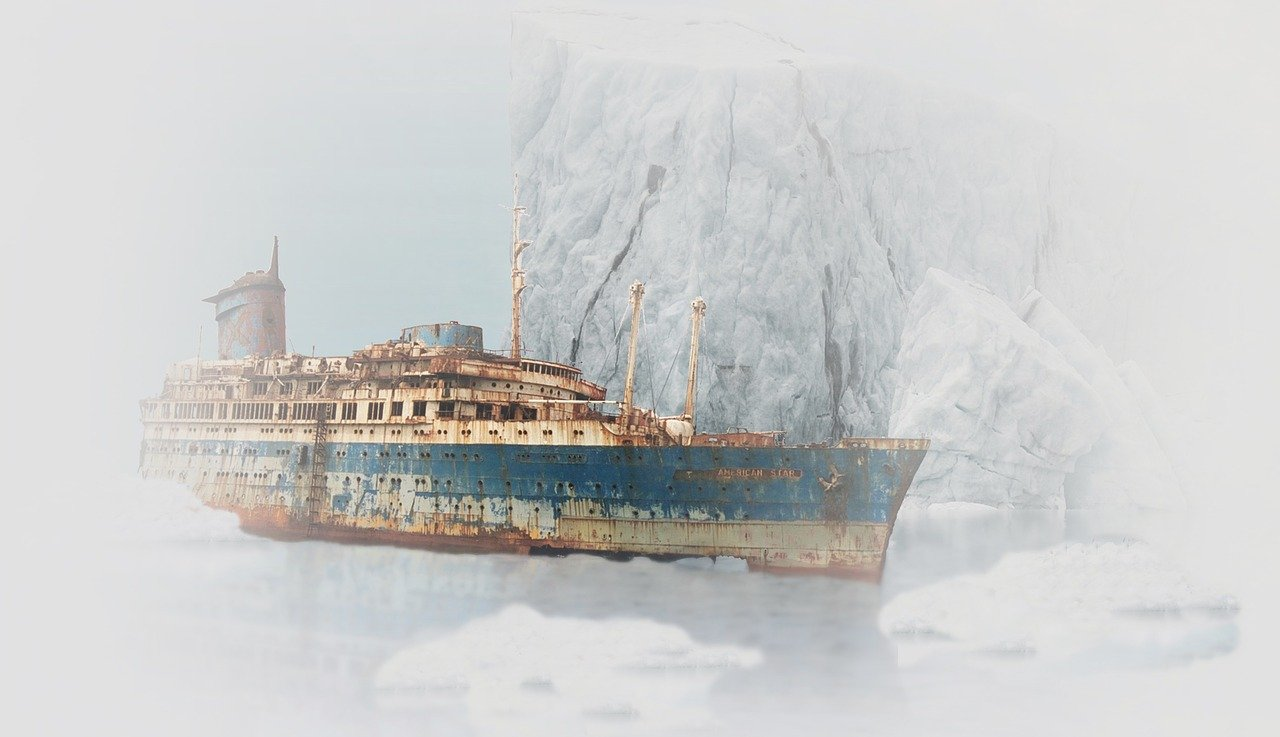

##**1. Introduction**

The SS Titanic, known worldwide for its shipwreck in 1912, was a state-of-the-art ship, being the largest afloat of its time. Tragically, of the 2,224 passengers, 1,514 died, making it one of modern history's marine disasters [1]. 
Several studies based on this tragic event used it as a model, on different areas such as naval [2], business [3] and history [4]. For statistics, it´s not different. We can use data from this study to extract some insightful ideas or concepts on social sciences [5] or even for educational purpose, such as Kaggle [6]. Kaggle is an online platfom that enables a phletora of datasets which users can practicize and apply data science.
In this study, it was used a dataset with Titanic data in order to perform exploratory data analysis and a Machine Learning model to predict probability of survival. 
The data is split into training set (train.csv) and test set (test.csv).
As it is described in Kaggle, the training set will be used to build the machine learning models, but also in the exploratory data analysis. The test DataFrame has the features and was merged to the submission DataFrame forming one test DataFrame. 

##**1.1. Variables description**

* PassengerId: identification number of passenger
* Survived: describes if individual survived. "0" means not survived; "1" means survived
* Pclass: A proxy for socio-economic status (SES)
> 1st = Upper\
> 2nd = Middle\
> 3rd = Lower
* Name: Passenger name
* Sex: tells if is male or female
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: siblings or spouses aboard the Titanic
* Parch: number of parents/children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them)
* Ticket: Ticket number
* Fare: Passenger Fare
* Cabin: Cabin number
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)









##**2. Exploratory data analysis**

**2.1. Importing libraries and creating DataFrames** 

In [1]:
#importing main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#creating DataFrames from csv files
df_test = pd.read_csv('/content/sample_data/test.csv') #outcome (also known as the “ground truth”) for each passenger
df_train = pd.read_csv('/content/sample_data/train.csv') #how well the model performs on unseen data
df_submission = pd.read_csv('/content/sample_data/gender_submission.csv') #set of predictions that assume all and only female passengers survive

In [3]:
print(df_test.shape)
print(df_submission.shape)
print(df_train.shape)

(418, 11)
(418, 2)
(891, 12)


The df_test DataFrame has the independent variables and submission test has the dependent variable, "Survive". Hence, both DataFrames will be joined, forming the test dataset.

In [4]:
df_test = pd.merge(df_submission, df_test, on='PassengerId')

In [5]:
df_test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**2.2. Data Treatment**

Missing data is a very common problem faced by data scientists. The decision to be made depends on the nature of data and its missing values. 
One option is dropping rows with null values. But with this choice too much data would be lost, compromising the intepratation and data analysis. Another strategy is filling missing values with average or median [7]. 

In [7]:
#checking for missing values, missing values/total and type in df_train dataset
for column in df_train.columns:
    if df_train[column].isnull().sum() != 0:
        print("_________________________________________________________________________________________________________")
        print(f"{column} -> Missing Values: {df_train[column].isnull().sum()} |Missing Values/total__ : {df_train[column].isnull().sum()/df_train.shape[0]} | dtypes: {df_train[column].dtypes}")

_________________________________________________________________________________________________________
Age -> Missing Values: 177 |Missing Values/total__ : 0.19865319865319866 | dtypes: float64
_________________________________________________________________________________________________________
Cabin -> Missing Values: 687 |Missing Values/total__ : 0.7710437710437711 | dtypes: object
_________________________________________________________________________________________________________
Embarked -> Missing Values: 2 |Missing Values/total__ : 0.002244668911335578 | dtypes: object


In [8]:
#checking for missing values, missing values/total and type in df_test dataset
for column in df_test.columns:
    if df_test[column].isnull().sum() != 0:
        print("_________________________________________________________________________________________________________")
        print(f"{column} -> Missing Values: {df_test[column].isnull().sum()} |Missing Values/total__ : {df_test[column].isnull().sum()/df_test.shape[0]} | dtypes: {df_test[column].dtypes}")

_________________________________________________________________________________________________________
Age -> Missing Values: 86 |Missing Values/total__ : 0.20574162679425836 | dtypes: float64
_________________________________________________________________________________________________________
Fare -> Missing Values: 1 |Missing Values/total__ : 0.0023923444976076554 | dtypes: float64
_________________________________________________________________________________________________________
Cabin -> Missing Values: 327 |Missing Values/total__ : 0.7822966507177034 | dtypes: object


The histogram bellow shows the distribution of "Age" data. The value of kurtosis describes the degree of peakedness of a distribution. It measures the decay of the distribution's tails relative to a measure of central tendency, which can be the mean or the median [8]. 

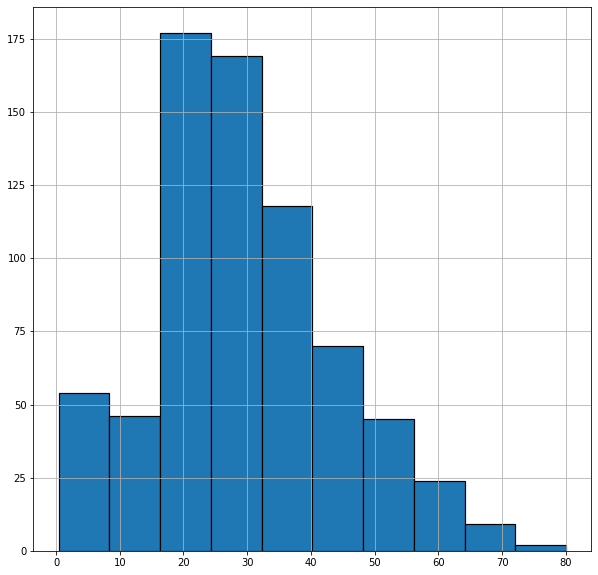

In [9]:
#Histogram distribution of "Age" data
df_train['Age'].hist(edgecolor="black", linewidth=1.2, figsize=(10, 10))

In [10]:
print('kurtosis: {:.1f}'.format(df_train['Age'].kurtosis()))

kurtosis: 0.2


In [11]:
print('Median: {:.1f}'.format(df_train.Age.median()))
print('Mean:   {:.1f}'.format(df_train.Age.mean()))

Median: 28.0
Mean:   29.7


Given the assimetric distribution of df_train['Age'], it will be filled with median values. However, it must be considered the median between class. Considering the distribution of Age between class it has the following: The average age of class 1 is greater than 2 and class 2 greater than 3.

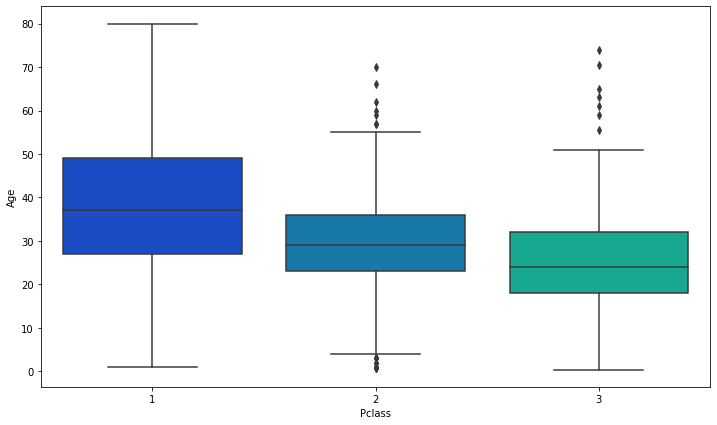

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y='Age', data = df_train, palette='winter')

The missing data will be filled with median considering the class.

df_test will also be filled with median values, by class.

In [13]:
def fill_median(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return df_train['Age'].where(df_train['Pclass']==1).median()
    
    elif Pclass == 2:
      return df_train['Age'].where(df_train['Pclass']==2).median()
    
    else:
      return df_train['Age'].where(df_train['Pclass']==3).median()
    
  else:
      return Age

In [14]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(fill_median, axis=1)

In [15]:
def fill_median(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return df_test['Age'].where(df_test['Pclass']==1).median()
    
    elif Pclass == 2:
      return df_test['Age'].where(df_test['Pclass']==2).median()
    
    else:
      return df_test['Age'].where(df_test['Pclass']==3).median()
    
  else:
      return Age

In [16]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(fill_median, axis=1)

In [17]:
#checking for null values after applying the fill_median function
print(df_train['Age'].isnull().sum())
print(df_test['Age'].isnull().sum())

0
0


In [18]:
#dropping missing values from df_train['Embarked']
df_train.dropna(subset=['Embarked'], inplace=True) 
print(df_train['Embarked'].isnull().sum())

0


Fare column from df_test has only one null value that will be replaced by median

In [19]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)
print(df_test['Fare'].isnull().sum())

0


It will be dropped some columns not useful for exploratory data analyses or machine learning models, including 'Cabin' column with missing values

In [20]:
df_train.drop(df_train.columns[[0, 3, 8, 10]], axis = 1, inplace=True)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


The same will be performed with df_test dataset

In [21]:
df_test.drop(df_test.columns[[0, 3, 8, 10]], axis = 1, inplace=True)
df_test.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q


**2.3 Exploratory data analysis**

The df_train dataset will be used for exploratory data analysis.

The DataFrame is composed of categorical data, such as "Survived", "Pclass", "Sex", "SibSp", "Parch" and "Embarked" and continous numerical data, such as "Age" and Fare.

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


**Pearson correlation**

Firstly, we see the Pearson correlation between two variables. Its measure returns the value of linear association between them, through the covariance of sample and product of standard deviation, being the value between -1 and 1. The more correlation, closest to 1 (positive correlation) or -1 (negative correlation) [9]. By default, the pandas uses numerical values, including categorical values.

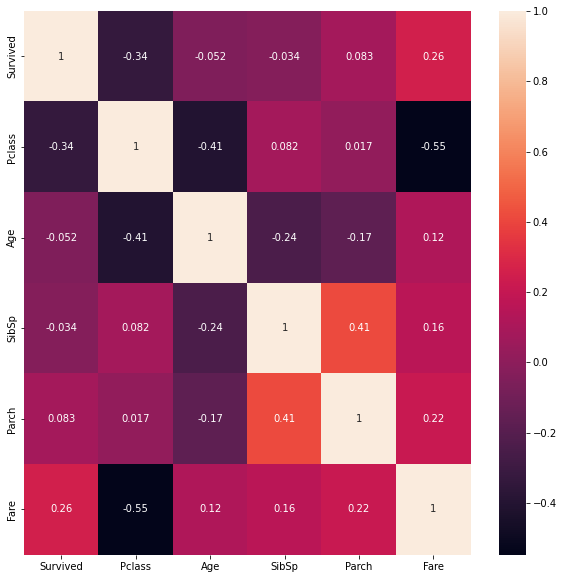

In [23]:
#correlation between variables
correlations = df_train.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

**Cramers V test**

As it has categorical variables, it is possible to correlate between them through specific tests, such as Cramer Test.

With Cramers V test, through Contigency table (ct), it is possible to correlate categorical values.

In [24]:
df_train_ct = pd.crosstab(index=df_train['Pclass'], columns=df_train['Survived'])

In [25]:
df_train_ct

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


In [26]:
df_train_ct.iloc[0].values

array([ 80, 134])

In [27]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([df_train_ct.iloc[0].values, df_train_ct.iloc[1].values, df_train_ct.iloc[2].values])

In [28]:
print('chi2:              {:.1f}'.format(chi2))
print('p-value:           {}'.format(p))
print('degree of freedom: {}'.format(dof))

chi2:              101.0
p-value:           1.1813624785477922e-22
degree of freedom: 2


Cramer V test

**V = SQRT(Chi2/(n*(min(C,R)-1))**

In [29]:
df_train.shape[0]

889

In [30]:
print('V = {:.2f}'.format(np.sqrt(chi2/(df_train.shape[0]))))

V = 0.34


Cramer V test for Embarked variable

In [31]:
df_train_ct_emb = pd.crosstab(index=df_train['Embarked'], columns=df_train['Survived'])

In [32]:
df_train_ct_emb

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [33]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([df_train_ct_emb.iloc[0].values, df_train_ct_emb.iloc[1].values, df_train_ct_emb.iloc[2].values])

In [34]:
print('chi2:              {:.1f}'.format(chi2))
print('p-value:           {}'.format(p))
print('degree of freedom: {}'.format(dof))

chi2:              26.5
p-value:           1.769922284120912e-06
degree of freedom: 2


In [35]:
print('V = {:.2f}'.format(np.sqrt(chi2/(df_train.shape[0]))))

V = 0.17


As can be seen in Graphics below, evaluating the surviving, the 3rd class had majority of non survived, reflecting also in the "Embarked" graphic, where the majority of 3rd class embarked. Hence, the majority that embarked in Southhampton didn´t survive. People who didn´t had siblings represent the majority that didn´t survive.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

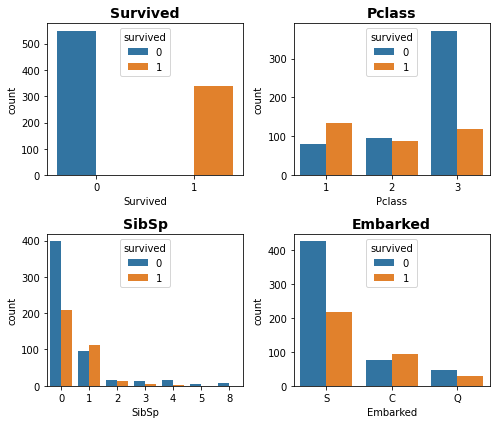

In [36]:
cols = ['Survived', 'Pclass', 'SibSp', 'Embarked']
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()  

It will be plotted the number of Survived and not survived. It can be observed by the graph that almost 60% didn´t survive. The second graph is a scatter plot, correlating age and survival. The majority of points lies in the range of 30 and 50 years.

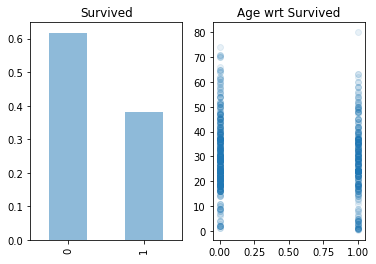

In [37]:
plt.subplot2grid((1,2), (0,0))
df_train.Survived.value_counts(normalize=True).plot(kind = 'bar', alpha = 0.5)
plt.title('Survived')

plt.subplot2grid((1,2), (0,1))
plt.scatter(df_train.Survived, df_train.Age, alpha = 0.1)
plt.title('Age wrt Survived')


plt.show()

With a graph of kernell density it is possible to see the distribution of age, classified by class. The upper the class, broadest the range of age.

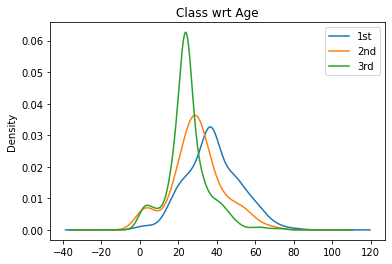

In [38]:
for x in [1,2,3]:
  df_train.Age[df_train.Pclass == x].plot(kind = 'kde')
plt.title('Class wrt Age')
plt.legend(('1st', '2nd', '3rd'))

plt.show()

It is possible to conclude that the 3rd class is the majority in Titanic and embarked in Southampton port.

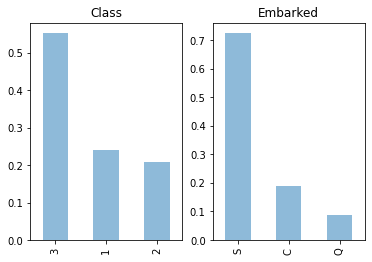

In [39]:
plt.subplot2grid((1,2), (0,0))
df_train.Pclass.value_counts(normalize=True).plot(kind = 'bar', alpha = 0.5)
plt.title('Class')

plt.subplot2grid((1,2), (0,1))
df_train.Embarked.value_counts(normalize=True).plot(kind = 'bar', alpha = 0.5)
plt.title('Embarked')
plt.show()

Combining both variables, it can be concluded that the 3rd class is the majority embarking in Queenstown while the the majority of 1st class embarked in Cherbourg.

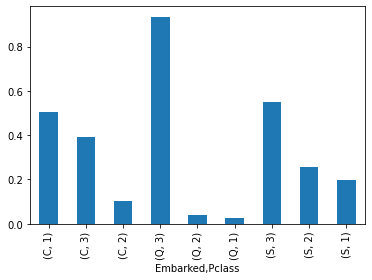

In [40]:
df_train.groupby(df_train['Embarked']).Pclass.value_counts(normalize=True).plot(kind='bar')

There is no significant difference of age distribution in each class.

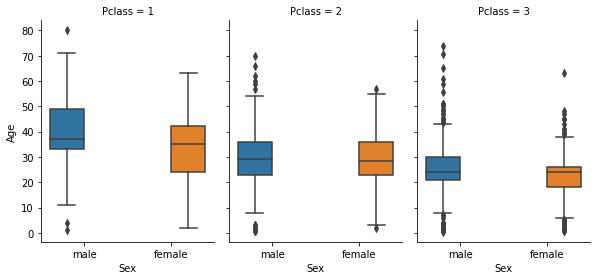

In [41]:
g = sns.catplot(x="Sex", y="Age",
                hue="Sex", col="Pclass",
                data=df_train, kind="box",
                height=4, aspect=.7);

Surviving rate by Sex

The survival rate of women and men decreases with class, being for men less than for women in all classes. The lowest chance of survival is in 3rd class men.

In [42]:
df_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.740385
male,0.188908


In [43]:
df_train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


##**3. Machine Learning Model**

**3.1 Feature engineering**

The methodology approach was based on the book Python Data Science Handbook, by Jake VanderPlas [10]. 
Through this interface the objects will instantiated and the `fit` method run to train the model. In this work, the trained model is already avaiable, without need to split into train and test.

The content is avaiable in https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html (author of *Python Data Science Handbook). 

1. Choose the model class by importing the appropriate *estimator class* into `Scikit-learn`.
2. Choose the model's hyperparameters, instantiating this class with the desired values.
3. Separate data between *features* array and target vector (not necessary in this study).
4. Fit the model by running the `fit()` method on the model instance.
5. Apply the model to new data, which can be:
    * For supervised learning, the `predict()` method is commonly used.
    * For unsupervised learning, we commonly transform or infer data properties using `transform()` or `predict()`.

**Transforming categorical data**

In [44]:
objList_train = df_train.select_dtypes(include = "object").columns
print(objList_train)

Index(['Sex', 'Embarked'], dtype='object')


In [45]:
#get dummies for object to numeric conversion

for feat in objList_train:
    df_train[feat] = pd.get_dummies(df_train, drop_first=True)

df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1,1.0,38.0,1,0,71.2833,1.0
2,1,3,1.0,26.0,0,0,7.9250,1.0


In [46]:
objList_test = df_test.select_dtypes(include = "object").columns
print(objList_test)

Index(['Sex', 'Embarked'], dtype='object')


In [47]:
for feat in objList_test:
    df_test[feat] = pd.get_dummies(df_test, drop_first=True)

df_test.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,34.5,0,0,7.8292,0.0
1,1,3,1.0,47.0,1,0,7.0000,1.0
2,0,2,0.0,62.0,0,0,9.6875,0.0


In [48]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(df_train.iloc[:,1:8])


sc = StandardScaler()
X_test_sc = sc.fit_transform(df_test.iloc[:,1:8])

In [50]:
#Firstly, transfoming X_train into a Dataframe from a numpy array and then concatenate with Survived column
X_train_sc = pd.DataFrame(X_train_sc, columns = df_train.iloc[:,1:8].columns)
X_test_sc = pd.DataFrame(X_test_sc, columns = df_test.iloc[:,1:8].columns)

In [51]:
df_train_sc = X_train_sc
df_train_sc['Survived'] = df_train['Survived']
df_test_sc = X_test_sc
df_test_sc['Survived'] = df_test['Survived']

In [52]:
df_train_sc['Survived'].isnull().sum()

2

In [53]:
df_train_sc.dropna(inplace=True)

In [54]:
df_train_sc.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [55]:
df_test_sc.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [56]:
df_train_sc.iloc[:, 0:7]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,-0.786961,-0.531670,0.431350,-0.474326,-0.500240,-0.786961
1,-1.572211,1.270711,0.680232,0.431350,-0.474326,0.788947,1.270711
2,0.825209,1.270711,-0.228695,-0.475199,-0.474326,-0.486650,1.270711
3,-1.572211,1.270711,0.453001,0.431350,-0.474326,0.422861,1.270711
4,0.825209,-0.786961,0.453001,-0.475199,-0.474326,-0.484133,-0.786961
...,...,...,...,...,...,...,...
884,-0.373501,-0.786961,-0.152951,-0.475199,-0.474326,-0.384475,-0.786961
885,-1.572211,1.270711,-0.758902,-0.475199,-0.474326,-0.042213,1.270711
886,0.825209,-0.786961,-0.380182,0.431350,2.006119,-0.174084,-0.786961
887,-1.572211,1.270711,-0.228695,-0.475199,-0.474326,-0.042213,1.270711


In [57]:
X_train = df_train_sc.iloc[:, 0:7]
y_train = df_train_sc['Survived']
X_test = df_test_sc.iloc[:, 0:7]
y_test = df_test_sc['Survived']

In [58]:
X_train.shape, y_train.shape

((887, 7), (887,))

In [59]:
X_test.shape, y_test.shape

((418, 7), (418,))

**3.2 Random Forest Classifier Model**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=100)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred = rfc.predict(X_test)

**Performance metrics**

In [64]:
print('rfc.score: {:.2f}'.format(rfc.score(X_train, y_train)))

rfc.score: 0.94


In this work, it is more important to keep false negatives to a minimum, that is, it is better to falsely predict that a person will not survive and will survive than predict that will survive but will not survive. <br> This model showed higher values ​​for non-survival predictions (>65%) of all metrics, but lower values ​​for survival prediction.

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       266
           1       0.43      0.38      0.40       152

    accuracy                           0.59       418
   macro avg       0.55      0.55      0.55       418
weighted avg       0.58      0.59      0.59       418



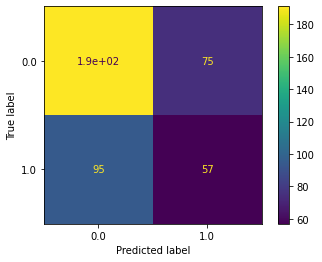

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
print('test ROC AUC: {:.1f}'.format(roc_auc_score(y_test, pred)))

test ROC AUC: 0.5


In [69]:
# Calculate the absolute errors
errors = abs(pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 1), 'degrees.')

Mean Absolute Error: 0.4 degrees.


In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)**(0.5)
print('Mean Squared Error:', round(mse, 1), 'degrees.')

Mean Squared Error: 0.6 degrees.


We calculated the treshold and it stayed close to 0.5, default value.

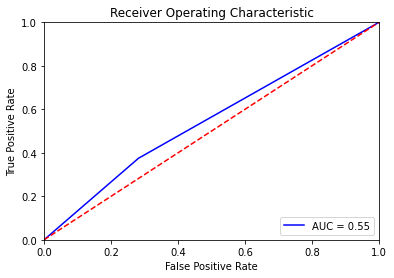

In [71]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification


fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
fpr, tpr, threshold = roc_curve(y_test, pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold

1.0

It was used shap values to evaluate feature importances. It is observed a major influence of Age and Fare values in the datasets.

In [73]:
!pip install shap

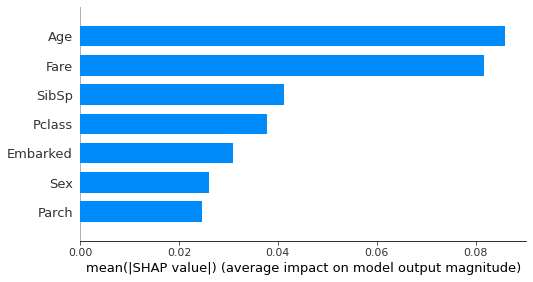

In [74]:
# explain the model's predictions using SHAP
import shap
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

SHAP summary plots show feature importance

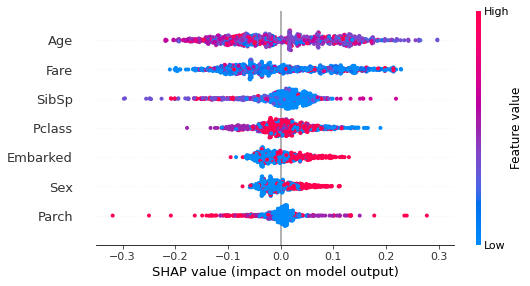

In [75]:
shap.summary_plot(shap_values[1], X_train)

##**4. Conclusion**

In this work, we used the Titanic dataset available in Kaggle to perform exploratory data analysis and implement a machine learning model with binary classifier. <br> Some relationships with variables, treatment of missing values ​​and statistical analysis were explored. <br> The chosen model was based on a random forest classifier, widely used for its versatility. It was possible to build a model capable of predicting Titanic Survival, with a score >94%. <br> Some feature engineering techniques based on data scaling, transformation of categorical variables, determination of thresholds and feature importance were explored and the metrics of the model were evaluated. <br> In this work it was possible to implement a machine learning model from scratch applied to binary classification. 





## **References**



*   [1] https://titanic.fandom.com/wiki/RMS_Titanic - accessed on 09.10.2021
*   [2] Schröder-Hinrichs, JU., Hollnagel, E. & Baldauf, M. From Titanic to Costa Concordia—a century of lessons not learned. WMU J Marit Affairs 11, 151–167 (2012)
*   [3] Smith, P.A.C. and Saint‐Onge, H. (1996), "The evolutionary organization: avoiding a Titanic fate", The Learning Organization, Vol. 3 No. 4, pp. 4-21
* [4] Howells R. (1999) Myth and the Titanic. In: The Myth of the Titanic. Palgrave Macmillan, London
* [5] Stolz, J., Lindemann, A. & Antonietti, JP. Sociological explanation and mixed methods: the example of the Titanic. Qual Quant 53, 1623–1643 (2019)
* [6] https://www.kaggle.com/c/titanic - accessed on 09.10.2021
*[7] https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d
*[8] S.M. Gandhi, B.C. Sarkar, Chapter 11 - Conventional and Statistical Resource/Reserve Estimation, Editor(s): S.M. Gandhi, B.C. Sarkar, Essentials of Mineral Exploration and Evaluation, Elsevier, 2016, Pages 271-288
* [9] Schober, Patrick MD, PhD, MMedStat; Boer, Christa PhD, MSc; Schwarte, Lothar A. MD, PhD, MBA Correlation Coefficients: Appropriate Use and Interpretation, Anesthesia & Analgesia: May 2018 - Volume 126 - Issue 5 - p 1763-1768
* [10] Jake VanderPlas, Python Data Science Handbook, 2016

I am thankful for S. Hermann & F. Richter for pixabay image



